In [2]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

In [3]:
p_data = pd.read_csv("../new_data/Persian/persian_annotations.csv")
na_data = pd.read_csv("../new_data/NA/na_annotations.csv")
cols = ["id", "filename","emotions","emoji","gender","confidence","comment","intensity"]

## Flattening data
contents = []
for i in range(0, p_data.shape[0]):
    row = p_data.iloc[i]
    for emotion in row['emotions'].split(','):
        # for emoji in row['emoji'].split(','):
        contents.append([row["id"], row["filename"], emotion, row['emoji'], row["gender"], row["confidence"],
                     row["comment"], row["intensity"]])
p_flattened_df = pd.DataFrame(columns=cols, data=contents)

contents = []
for i in range(0, na_data.shape[0]):
    row = na_data.iloc[i]
    for emotion in row['emotions'].split(','):
        # for emoji in row['emoji'].split(','):
        contents.append([row["id"], row["filename"], emotion, row['emoji'], row["gender"], row["confidence"],
                     row["comment"], row["intensity"]])
na_flattened_df = pd.DataFrame(columns=cols, data=contents)

In [4]:
p_labels_df = pd.read_csv("../new_data/Persian/labels.csv", index_col='filename')
p_labels_df['emotions'] = p_labels_df['emotions'].apply(eval)


In [5]:
na_labels_df = pd.read_csv("../new_data/NA/na_labels.csv", index_col=['filename'])
na_labels_df['emotions'] = na_labels_df['emotions'].apply(eval)

In [6]:
p_average_intensity = p_flattened_df.groupby(['filename'])['intensity'].mean()
p_average_confidence = p_flattened_df.groupby(['filename'])['confidence'].mean()


In [7]:
na_average_intensity = na_flattened_df.groupby(['filename'])['intensity'].mean()
na_average_confidence = na_flattened_df.groupby(['filename'])['confidence'].mean()

In [8]:
p_labels_df = pd.concat([p_labels_df, p_average_intensity, p_average_confidence], axis=1)
na_labels_df = pd.concat([na_labels_df, na_average_intensity, na_average_confidence], axis=1)

In [9]:
na_labels_df.tail()

,gender,emotions,intensity,confidence
filename,,,,
na/vid_90.mp4,male,[anger],3.875000,3.625000
na/vid_92.mp4,male,[anger],3.750000,3.625000
na/vid_93.mp4,male,[anger],2.400000,3.400000
na/vid_95.mp4,female,"[anger, hatred]",3.285714,4.285714
na/vid_97.mp4,female,[furious],4.833333,4.000000


In [12]:
contents = []
for idx in p_labels_df.index:
    row = p_labels_df.loc[idx]
    # print(i)
    for emotion in row['emotions']:
        contents.append([idx, emotion, row['intensity'], row['confidence']])

p_intensity_flattened = pd.DataFrame(columns=['filename', 'emotion', 'intensity', 'confidence'], data=contents)
p_intensity_flattened

,filename,emotion,intensity,confidence
0,persian/vid_1.mp4,annoyed,2.500,4.000000
1,persian/vid_10.mp4,contempt,2.500,3.666667
2,persian/vid_11.mp4,contempt,2.625,3.625000
3,persian/vid_12.mp4,contempt,2.400,4.000000
4,persian/vid_13.mp4,anger,1.750,4.250000
...,...,...,...,...
116,persian/vid_94.mp4,none,1.500,3.000000
117,persian/vid_95.mp4,contempt,3.250,4.375000
118,persian/vid_95.mp4,hatred,3.250,4.375000
119,persian/vid_96.mp4,contempt,2.200,3.200000


In [13]:
contents = []
for idx in na_labels_df.index:
    row = na_labels_df.loc[idx]
    # print(i)
    for emotion in row['emotions']:
        contents.append([idx, emotion, row['intensity'], row['confidence']])

na_intensity_flattened = pd.DataFrame(columns=['filename', 'emotion', 'intensity', 'confidence'], data=contents)
na_intensity_flattened

,filename,emotion,intensity,confidence
0,na/vid_1.mp4,none,0.800000,3.400000
1,na/vid_100.mp4,furious,4.375000,4.000000
2,na/vid_101.mp4,furious,5.250000,4.500000
3,na/vid_102.mp4,anger,3.285714,3.428571
4,na/vid_104.mp4,anger,4.600000,4.000000
...,...,...,...,...
109,na/vid_92.mp4,anger,3.750000,3.625000
110,na/vid_93.mp4,anger,2.400000,3.400000
111,na/vid_95.mp4,anger,3.285714,4.285714
112,na/vid_95.mp4,hatred,3.285714,4.285714


In [26]:
p_i_mean = p_intensity_flattened.groupby('emotion')['intensity'].mean()
na_i_mean = na_intensity_flattened.groupby('emotion')['intensity'].mean()
df = pd.concat([na_i_mean, p_i_mean], axis=1, keys=['NA', 'P'])
df
# .plot(kind='bar', title='FE Intensity of labels', ylabel='', yticks=range(0,7))

,NA,P
emotion,,
anger,3.536873,3.368044
annoyed,1.639744,3.038476
contempt,1.386275,2.903950
disgust,2.431548,3.665476
furious,4.706037,4.053129
hatred,3.698413,3.635839
none,0.926667,2.397436


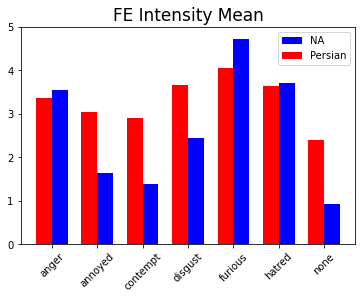

In [29]:
ind = np.arange(len(df))
width = 0.35
ax = plt.subplot(111)
ax.bar(ind+width/2, df['NA'], width=width,color='b', align='center')
ax.bar(ind-width/2, df['P'], width=width,color='r', align='center')
ax.legend(('NA','Persian'))
plt.xticks(ind, df.index, rotation=45)
plt.yticks(range(6))
plt.title("FE Intensity Mean", fontsize=17)
plt.show()

In [19]:
p_f_mean = p_intensity_flattened.groupby('emotion')['confidence'].mean()
na_f_mean = na_intensity_flattened.groupby('emotion')['confidence'].mean()
df = pd.concat([na_f_mean, p_f_mean], axis=1, keys=['NA', 'P'])
df
# .plot(kind='bar', title='Annotator\'s confidence of labels', ylabel='', yticks = range(0,6))

,NA,P
emotion,,
anger,4.149238,4.256919
annoyed,3.937912,3.925810
contempt,3.815686,3.944300
disgust,3.997976,3.733333
furious,4.401531,4.358187
hatred,4.365079,4.197711
none,3.810000,3.678022


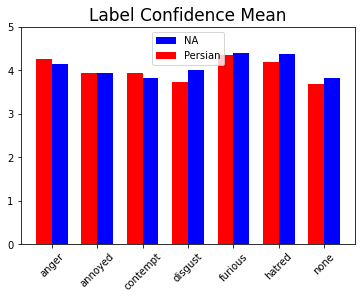

In [25]:
ind = np.arange(len(df))
width = 0.35
ax = plt.subplot(111)
ax.bar(ind+width/2, df['NA'], width=width,color='b', align='center')
ax.bar(ind-width/2, df['P'], width=width,color='r', align='center')
ax.legend(('NA','Persian'))
plt.xticks(ind, df.index, rotation=45)
plt.yticks(range(0,6))
plt.title("Label Confidence Mean", fontsize=17)
plt.show()

<AxesSubplot:title={'center':'Intensity STD'}, xlabel='emotion'>

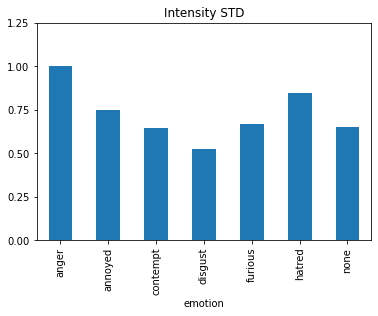

In [16]:
p_intensity_flattened.groupby('emotion')['intensity'].std().plot(kind='bar', title='Intensity STD', ylabel='', yticks = [0, 0.25, 0.5, 0.75, 1.0, 1.25])

<AxesSubplot:title={'center':'Intensity STD'}, xlabel='emotion'>

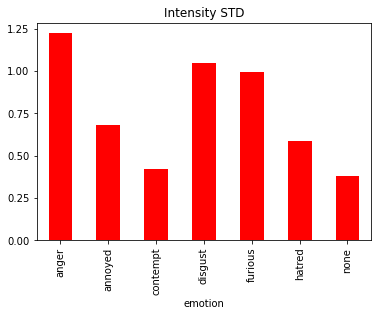

In [18]:
na_intensity_flattened.groupby('emotion')['intensity'].std().plot(kind='bar', title='Intensity STD', ylabel='', yticks = [0, 0.25, 0.5, 0.75, 1.0, 1.25], color='red')

<AxesSubplot:title={'center':'Confidence score STD'}, xlabel='emotion'>

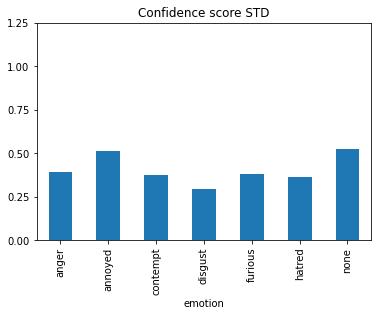

In [19]:
p_intensity_flattened.groupby('emotion')['confidence'].std().plot(kind='bar', title='Confidence score STD', ylabel='', yticks = [0, 0.25, 0.5, 0.75, 1.0, 1.25])

<AxesSubplot:title={'center':'Confidence score STD'}, xlabel='emotion'>

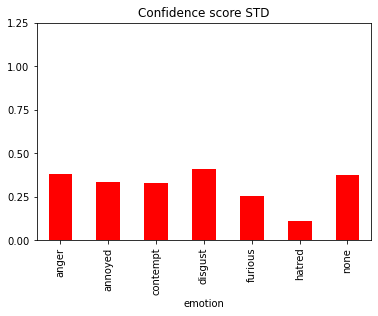

In [20]:
na_intensity_flattened.groupby('emotion')['confidence'].std().plot(kind='bar', title='Confidence score STD', ylabel='', yticks = [0, 0.25, 0.5, 0.75, 1.0, 1.25], color='red')